In [1]:
import pandas as pd

# Read csv file into DataFrame
df = pd.read_csv('/home/mcc/Public/AB_Testing/data/AdSmartABdata.csv')

https://www.kaggle.com/code/mohamedahmed10000/a-b-test-to-an-e-commerce-website-new-or-old

In [2]:
df2 = df.drop(columns=['auction_id', 'date', 'hour', 'device_make', 'platform_os', 'device_make', 'browser'])

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   experiment  8077 non-null   object
 1   yes         8077 non-null   int64 
 2   no          8077 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 189.4+ KB


In [6]:
df2.head()

,experiment,yes,no
0,exposed,0,0
1,exposed,0,0
2,exposed,0,1
3,control,0,0
4,control,0,0


In [7]:
# The proportion of ALL users converted.

P_population = df2['yes'].mean()
P_population

0.07081837315835088

In [16]:
# The proportion of control users converted.

control_df = df2.query('experiment == "control"')
control_convert = control_df['yes'].mean()
control_convert

0.06484893146647015

In [17]:
# The proportion of experiment users converted.

exposed_df = df2.query('experiment == "exposed"')
exposed_convert = exposed_df['yes'].mean()
exposed_convert

0.07688467299051423

In [18]:
# Calculate the difference between the conversion rates for the two groups.

difference_in_observations = control_convert - exposed_convert
difference_in_observations

-0.012035741524044075

In [11]:
# What is the probability that an individual received the new page?

df2.query('experiment == "exposed"').count()[0] / df2.shape[0]

0.495976228797821

### A/B Hypothese Testing

$\alpha = 0.05$

$H0: p_{new} - p_{old} \le 0$

$H1: p_{new} - p_{old} > 0$


In [12]:
n_new = df2.query('experiment == "exposed"').shape[0]
n_new

4006

In [13]:
n_old = df2.query('experiment == "control"').shape[0]
n_old

4071

In [56]:
# What is the conversion rate for p_new under the null?

n_converted = len(df2.query("yes == 1 "))
n_con_new = len(df2.query("yes == 1 & experiment == 'exposed'"))
n_con_old = len(df2.query("yes == 0 & experiment == 'exposed'"))
n_con_new / n_converted 

0.5384615384615384

In [58]:
# What is the conversion rate for pold under the null?
# ?????????????????????????
n_con_old / n_converted

6.465034965034965

In [30]:
# What is nnew, the number of individuals in the treatment group?

len(df2.query("experiment == 'exposed'"))

4006

In [31]:
# What is nold, the number of individuals in the control group?

len(df2.query("experiment == 'control'"))

4071

In [59]:
4006/4071

0.984033407025301

In [32]:
# Simulate nnew transactions with a conversion rate of pnew under the null. 
# Store these nnew 1's and 0's in new_page_converted.

new_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - exposed_ctr), exposed_ctr])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
# Simulate nold transactions with a conversion rate of pold under the null. 
# Store these nold 1's and 0's in old_page_converted.

old_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - exposed_ctr), exposed_ctr])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# Find pnew - pold for your simulated values from part (e) and (f).

new_page_converted.mean() - old_page_converted.mean()

0.017790312811303804

In [36]:
# Create 10,000 pnew - pold values using the same simulation process you used in parts (a) through (g) above. 
# Store all 10,000 values in a NumPy array called p_diffs.

p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - exposed_ctr), exposed_ctr])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - exposed_ctr), exposed_ctr])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
p_diffs = np.asarray(p_diffs)


In [46]:
p_diffs

array([-0.003174  ,  0.00320865,  0.00048668, ..., -0.00968818,
        0.00761821,  0.00742837])

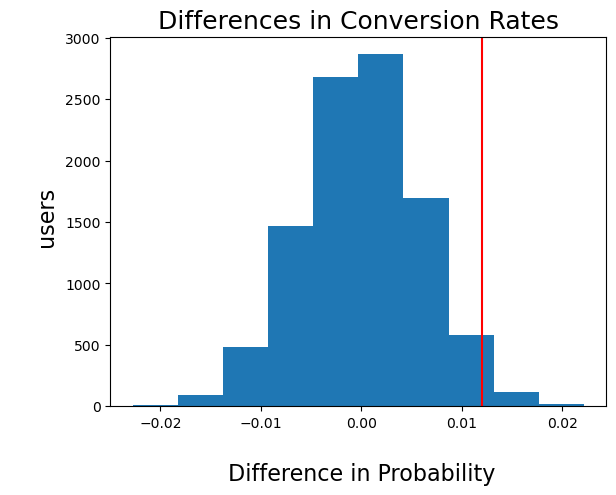

In [47]:
import matplotlib.pyplot as plt

plt.hist(p_diffs)
plt.title("Differences in Conversion Rates", fontsize=18)
plt.xlabel("\n Difference in Probability", fontsize=16)
plt.ylabel("\n users", fontsize=16)
plt.axvline(exposed_ctr - control_ctr, color='r');

In [49]:
obs_diff = control_ctr - exposed_ctr

(p_diffs > obs_diff).mean()

0.9804